# Evaluation Project

# Temperature Forecast Project using ML

# Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS 
model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data 
from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and 
minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and
minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Input Features :

1. station - used weather station number: 1 to 25

2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645

20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature
for the next day based on the details provided in the dataset.

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df=pd.read_csv('Temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
#Checking for top 5 rows 
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
#checking for bottom5 rows
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [5]:
#checking shape of dataset
df.shape

(7752, 25)

In [6]:
#Checking info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [7]:
#Checking the datatypes
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [8]:
#Checking for columns
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [9]:
#We will remove Date Column as it is of no use
df.drop('Date',axis=1,inplace=True)

In [10]:
#Checking for null values
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [11]:
# Dataset contains null values need to transform with mean value of column using SimpleImputer
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'mean')
impu =imp.fit_transform(df)
df1 = pd.DataFrame(impu,columns = df.columns)

In [12]:
#Checking null values again
df1.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [13]:
#Remove unwanted columns
df1.drop(columns=['station','Present_Tmax','Present_Tmin'],axis=1,inplace=True)

In [14]:
#Checking the shape of the dataset
df1.shape

(7752, 21)

In [15]:
df1.head(15)

,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,0.232841,0.146363,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,0.389600,0.333570,0.270419,0.145705,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,0.357856,0.344928,0.272387,0.143841,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,0.408766,0.344800,0.264980,0.148911,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,0.348292,0.306255,0.245254,0.135443,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [16]:
df1['LDAPS_PPT2'].value_counts()

0.000000    5151
0.485003      75
0.001953       7
0.000040       3
0.000781       3
            ... 
0.012846       1
0.020298       1
0.003971       1
0.009729       1
0.247997       1
Name: LDAPS_PPT2, Length: 2511, dtype: int64

In [17]:
df1['LDAPS_PPT3'].value_counts()

0.000000    5294
0.278200      75
0.001953      10
0.000852       4
0.002604       3
            ... 
0.009490       1
0.005241       1
0.114325       1
0.007045       1
0.021030       1
Name: LDAPS_PPT3, Length: 2357, dtype: int64

In [18]:
df1['LDAPS_PPT4'].value_counts()

0.000000     5751
0.269407       75
0.001953        3
16.655469       2
0.001105        2
             ... 
7.717283        1
4.304705        1
7.094713        1
5.862256        1
3.093815        1
Name: LDAPS_PPT4, Length: 1919, dtype: int64

In [19]:
#Dataset which contains zero's minimum values need to replace with mean value of each columns
df1['LDAPS_PPT2'] = df1['LDAPS_PPT2'].replace(0,df1['LDAPS_PPT2'].mean())
df1['LDAPS_PPT3'] = df1['LDAPS_PPT3'].replace(0,df1['LDAPS_PPT3'].mean())
df1['LDAPS_PPT4'] = df1['LDAPS_PPT4'].replace(0,df1['LDAPS_PPT4'].mean())

In [20]:
#Now checking all the zero's should be converted with mean of their respected columns
df1.head(15)

,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,...,0.485003,0.2782,0.269407,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,...,0.485003,0.2782,0.269407,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,...,0.485003,0.2782,0.269407,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,...,0.485003,0.2782,0.269407,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,...,0.485003,0.2782,0.269407,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,0.232841,0.146363,...,0.485003,0.2782,0.269407,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,0.389600,0.333570,0.270419,0.145705,...,0.485003,0.2782,0.269407,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,0.357856,0.344928,0.272387,0.143841,...,0.485003,0.2782,0.269407,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,0.408766,0.344800,0.264980,0.148911,...,0.485003,0.2782,0.269407,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,0.348292,0.306255,0.245254,0.135443,...,0.485003,0.2782,0.269407,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


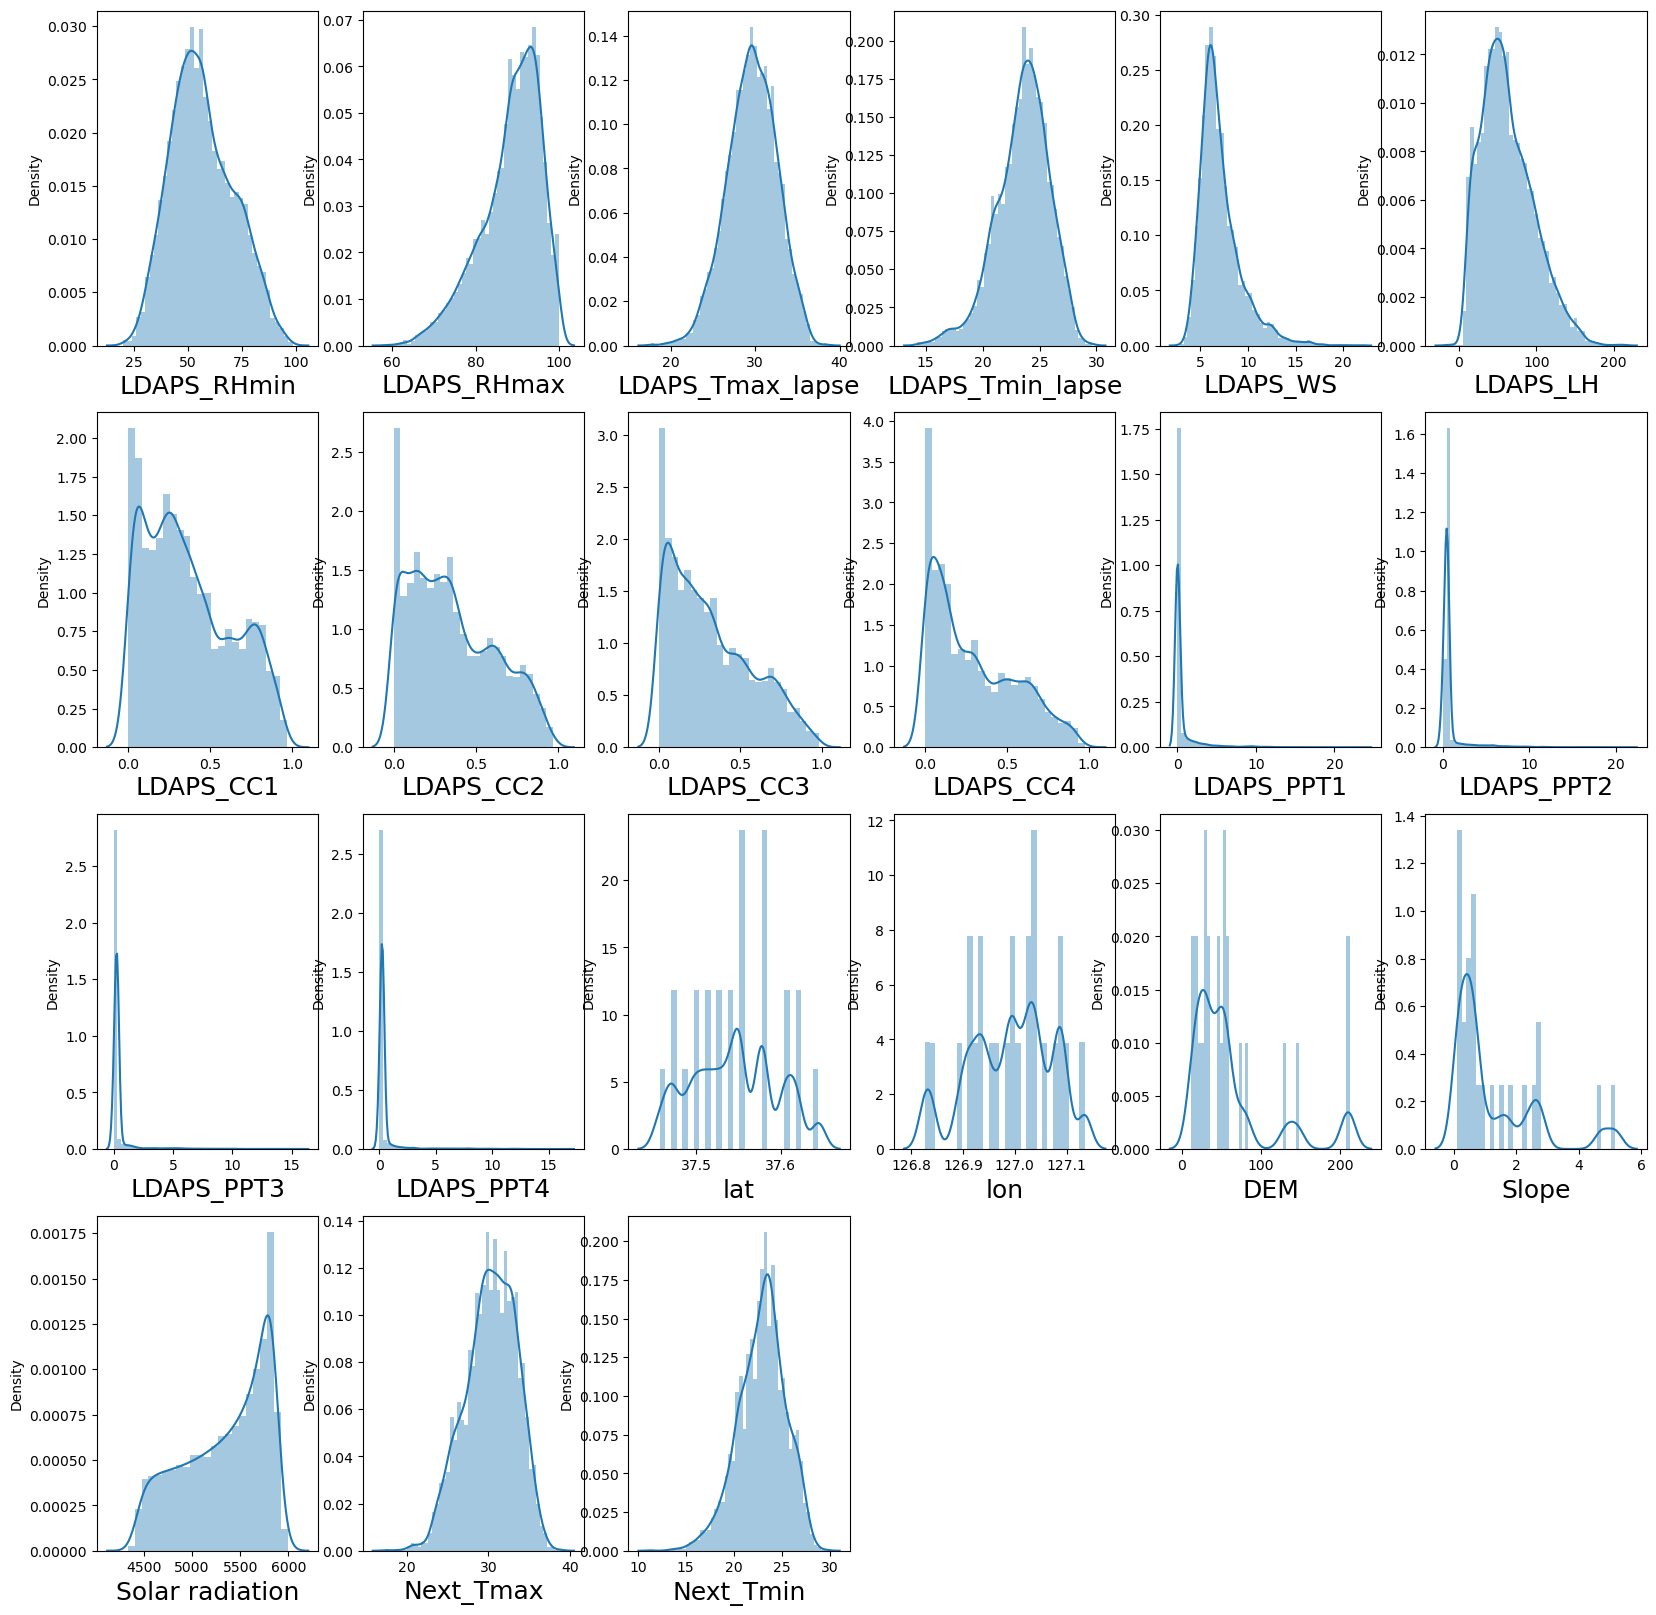

In [21]:
# plotting distplot plot to check the skewness 
plt.figure(figsize = (20,20))
plt_num =1

for column in df1:
    if plt_num<=25:
        ax = plt.subplot(4,6,plt_num)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize = 18)
    plt_num+=1
plt.show()

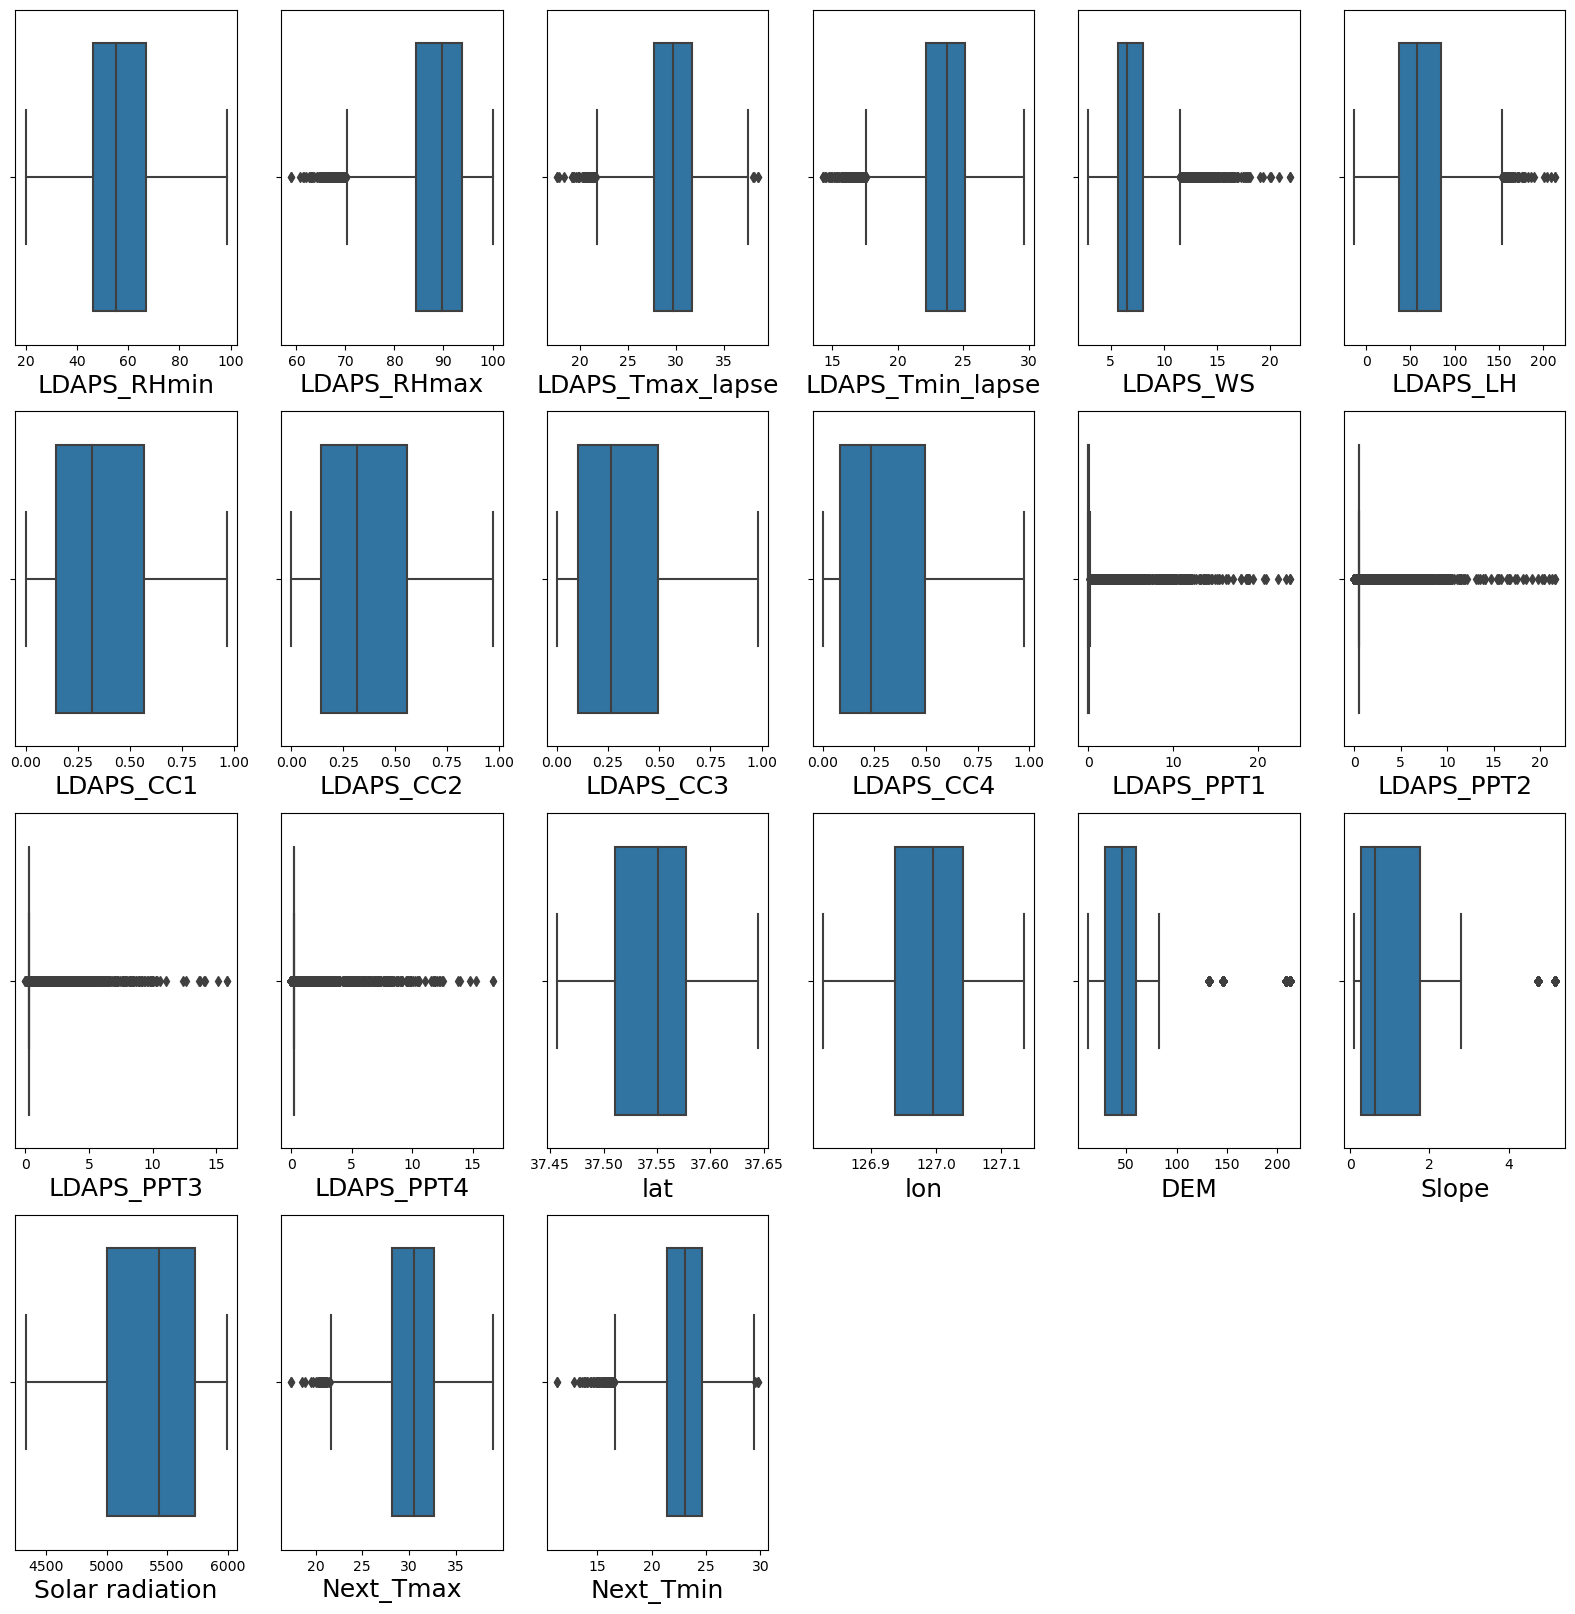

In [22]:
# plotting box plot to check outliers in the data set
plt.figure(figsize = (20,20))
plt_num =1

for column in df1:
    if plt_num<=25:
        sx = plt.subplot(4,6,plt_num)
        sns.boxplot(df1[column])
        plt.xlabel(column,fontsize = 18)
    plt_num+=1
plt.show()

In [23]:
#finding the outliers 
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)
iqr = q3- q1

In [24]:
iqr

LDAPS_RHmin          20.992092
LDAPS_RHmax           9.387577
LDAPS_Tmax_lapse      3.990727
LDAPS_Tmin_lapse      3.019349
LDAPS_WS              2.320984
LDAPS_LH             46.371822
LDAPS_CC1             0.423375
LDAPS_CC2             0.412635
LDAPS_CC3             0.390907
LDAPS_CC4             0.414489
LDAPS_PPT1            0.067593
LDAPS_PPT2            0.000000
LDAPS_PPT3            0.000000
LDAPS_PPT4            0.000000
lat                   0.067400
lon                   0.105000
DEM                  31.132400
Slope                 1.496500
Solar radiation     729.297851
Next_Tmax             4.400000
Next_Tmin             3.200000
dtype: float64

In [25]:
# Removing outliers in the LDAPS_RHmin column
min = (q3.LDAPS_RHmin + (0.5 * iqr.LDAPS_RHmin))
min

index = np.where(df1['LDAPS_RHmin']>min)
index

df1 = df1.drop(df1.index[index])
df1.shape

df1.reset_index()

,index,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,...,0.485003,0.2782,0.269407,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,1,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,...,0.485003,0.2782,0.269407,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,2,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,...,0.485003,0.2782,0.269407,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,3,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,...,0.485003,0.2782,0.269407,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,4,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,...,0.485003,0.2782,0.269407,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,7746,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,...,0.485003,0.2782,0.269407,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1
6980,7747,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,...,0.485003,0.2782,0.269407,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
6981,7748,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,...,0.485003,0.2782,0.269407,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
6982,7749,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000e+00,...,0.485003,0.2782,0.269407,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4


In [26]:
# Removing outliers in the LDAPS_RHmax column
max = (q3.LDAPS_RHmax + (0.5 * iqr.LDAPS_RHmax))
max

index = np.where(df1['LDAPS_RHmax']>max)
index

df1 = df1.drop(df1.index[index])
df1.shape

df1.reset_index()

,index,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,...,0.485003,0.2782,0.269407,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,1,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,...,0.485003,0.2782,0.269407,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,2,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,...,0.485003,0.2782,0.269407,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,3,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,...,0.485003,0.2782,0.269407,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,4,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,...,0.485003,0.2782,0.269407,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6853,7746,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,...,0.485003,0.2782,0.269407,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1
6854,7747,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,...,0.485003,0.2782,0.269407,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
6855,7748,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,...,0.485003,0.2782,0.269407,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
6856,7749,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000e+00,...,0.485003,0.2782,0.269407,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4


In [27]:
# Removing outliers in the LDAPS_Tmax_Lapse column
lp = (q3.LDAPS_Tmax_lapse + (0.5 * iqr.LDAPS_Tmax_lapse))
lp

index = np.where(df1['LDAPS_Tmax_lapse']>lp)
index

df1 = df1.drop(df1.index[index])
df1.shape

df1.reset_index()

,index,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,...,0.485003,0.2782,0.269407,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,1,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,...,0.485003,0.2782,0.269407,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,2,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,...,0.485003,0.2782,0.269407,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,3,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,...,0.485003,0.2782,0.269407,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,4,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,...,0.485003,0.2782,0.269407,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6242,7746,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,...,0.485003,0.2782,0.269407,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1
6243,7747,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,...,0.485003,0.2782,0.269407,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
6244,7748,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,...,0.485003,0.2782,0.269407,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
6245,7749,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000e+00,...,0.485003,0.2782,0.269407,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4


In [28]:
# Removing outliers in the LDAPS_Tmin_lapse column
lp1 = (q3.LDAPS_Tmin_lapse + (0.5 * iqr.LDAPS_Tmin_lapse))
lp1

index = np.where(df1['LDAPS_Tmin_lapse']>lp1)
index

df1 = df1.drop(df1.index[index])
df1.shape

df1.reset_index()

,index,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,...,0.485003,0.2782,0.269407,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,1,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,...,0.485003,0.2782,0.269407,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,2,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,...,0.485003,0.2782,0.269407,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,3,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,...,0.485003,0.2782,0.269407,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,4,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,...,0.485003,0.2782,0.269407,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5926,7746,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,...,0.485003,0.2782,0.269407,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1
5927,7747,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,...,0.485003,0.2782,0.269407,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
5928,7748,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,...,0.485003,0.2782,0.269407,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
5929,7749,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000e+00,...,0.485003,0.2782,0.269407,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4


In [29]:
# Removing outliers in the LDAPS_LH column
lh = (q3.LDAPS_LH + (0.5 * iqr.LDAPS_LH))
lh

index = np.where(df1['LDAPS_LH']>lh)
index

df1 = df1.drop(df1.index[index])
df1.shape

df1.reset_index()

,index,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,...,0.485003,0.2782,0.269407,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,1,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,...,0.485003,0.2782,0.269407,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,2,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,...,0.485003,0.2782,0.269407,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,3,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,...,0.485003,0.2782,0.269407,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,2.328410e-01,...,0.485003,0.2782,0.269407,37.5102,127.042,54.6384,0.145700,5873.780762,31.5,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5181,7746,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,...,0.485003,0.2782,0.269407,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1
5182,7747,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,...,0.485003,0.2782,0.269407,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
5183,7748,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,...,0.485003,0.2782,0.269407,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
5184,7749,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000e+00,...,0.485003,0.2782,0.269407,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4


In [30]:
# Removing outliers in the DEM column
dm = (q3.DEM + (0.5 * iqr.DEM))
dm

index = np.where(df1['DEM']>dm)
index

df1 = df1.drop(df1.index[index])
df1.shape

df1.reset_index()

,index,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,...,0.485003,0.2782,0.269407,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
1,2,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,...,0.485003,0.2782,0.269407,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
2,3,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,...,0.485003,0.2782,0.269407,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
3,5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,2.328410e-01,...,0.485003,0.2782,0.269407,37.5102,127.042,54.6384,0.145700,5873.780762,31.5,24.0
4,7,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,0.357856,0.344928,2.723873e-01,...,0.485003,0.2782,0.269407,37.4697,126.910,52.5180,1.562900,5863.992188,31.1,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108,7746,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,...,0.485003,0.2782,0.269407,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1
4109,7747,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,...,0.485003,0.2782,0.269407,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
4110,7748,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,...,0.485003,0.2782,0.269407,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
4111,7749,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000e+00,...,0.485003,0.2782,0.269407,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4


In [34]:
df1.rename(columns={'Solar radiation':'Solar_radiation'},inplace=True)

In [35]:
df1

,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar_radiation,Next_Tmax,Next_Tmin
1,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,...,0.485003,0.2782,0.269407,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,...,0.485003,0.2782,0.269407,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,...,0.485003,0.2782,0.269407,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,2.328410e-01,0.146363,...,0.485003,0.2782,0.269407,37.5102,127.042,54.6384,0.145700,5873.780762,31.5,24.0
7,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,0.357856,0.344928,2.723873e-01,0.143841,...,0.485003,0.2782,0.269407,37.4697,126.910,52.5180,1.562900,5863.992188,31.1,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7746,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,...,0.485003,0.2782,0.269407,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1
7747,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,...,0.485003,0.2782,0.269407,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,...,0.485003,0.2782,0.269407,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000e+00,0.000796,...,0.485003,0.2782,0.269407,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4


In [38]:
#splitting labels and features
x = df1.drop(columns = ['Next_Tmax','Next_Tmin'])
y = df1['Next_Tmin']

In [39]:
x

,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar_radiation
1,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.485003,0.2782,0.269407,37.6046,127.032,44.7624,0.514100,5869.312500
2,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.485003,0.2782,0.269407,37.5776,127.058,33.3068,0.266100,5863.555664
3,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.485003,0.2782,0.269407,37.6450,127.022,45.7160,2.534800,5856.964844
5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,2.328410e-01,0.146363,0.0,0.485003,0.2782,0.269407,37.5102,127.042,54.6384,0.145700,5873.780762
7,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,0.357856,0.344928,2.723873e-01,0.143841,0.0,0.485003,0.2782,0.269407,37.4697,126.910,52.5180,1.562900,5863.992188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7746,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.485003,0.2782,0.269407,37.5102,127.086,21.9668,0.133200,4441.803711
7747,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.485003,0.2782,0.269407,37.5372,126.891,15.5876,0.155400,4443.313965
7748,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.485003,0.2782,0.269407,37.5237,126.909,17.2956,0.222300,4438.373535
7749,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000e+00,0.000796,0.0,0.485003,0.2782,0.269407,37.5237,126.970,19.5844,0.271300,4451.345215


In [40]:
y

1       22.5
2       23.9
3       24.3
5       24.0
7       22.9
        ... 
7746    17.1
7747    18.1
7748    18.8
7749    17.4
7750    11.3
Name: Next_Tmin, Length: 4113, dtype: float64

In [41]:
#Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar_radiation
0,-0.188589,0.474874,0.162877,0.367809,-0.569250,-0.053265,-0.569417,-0.456811,-0.694429,-0.704753,-0.284152,-0.141934,-0.121929,-0.17013,1.491678,0.503394,0.348107,-0.379548,1.216169
1,-0.475764,-0.462758,0.263608,0.625610,-0.329235,-1.283780,-0.634365,-0.432737,-0.501490,-0.646333,-0.284152,-0.141934,-0.121929,-0.17013,0.861512,0.818867,-0.320438,-0.714065,1.203307
2,0.291767,1.306150,0.101728,0.023427,-0.591749,0.487744,-0.606125,-0.565681,-0.687025,-0.678292,-0.284152,-0.141934,-0.121929,-0.17013,2.434594,0.382059,0.403759,2.346092,1.188582
3,-0.174625,-0.274180,-0.101441,0.264617,-0.305536,-0.120199,-0.731055,-0.334092,-0.377251,-0.629138,-0.284152,-0.141934,-0.121929,-0.17013,-0.711570,0.624730,0.924467,-0.876467,1.226152
4,-0.183540,-1.306772,-0.255240,0.262888,-0.347415,-0.442687,-0.037656,-0.063235,-0.206356,-0.639373,-0.284152,-0.141934,-0.121929,-0.17013,-1.656820,-0.976902,0.800721,1.035136,1.204282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108,-1.970397,-0.502854,-1.154132,-2.654618,-0.528277,1.131930,-1.208451,-1.416926,-1.383447,-1.151281,-0.284152,-0.141934,-0.121929,-0.17013,-0.711570,1.158607,-0.982236,-0.893328,-1.973124
4109,-2.239940,-1.184417,-1.301845,-2.187409,-0.323485,0.736133,-1.354811,-1.178151,-1.383450,-1.223010,-0.284152,-0.141934,-0.121929,-0.17013,-0.081404,-1.207440,-1.354524,-0.863383,-1.969749
4110,-2.457008,-1.407103,-1.026320,-2.207892,-0.111666,-0.237502,-1.331347,-1.203807,-1.383450,-1.223010,-0.284152,-0.141934,-0.121929,-0.17013,-0.396487,-0.989035,-1.254846,-0.773145,-1.980787
4111,-2.546034,-1.414347,-0.637252,-2.310189,0.289732,-1.734291,-1.278795,-1.267576,-1.383450,-1.219779,-0.284152,-0.141934,-0.121929,-0.17013,-0.396487,-0.248887,-1.121272,-0.707051,-1.951806


In [44]:
#splitting into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 48)

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [46]:
# Applying KNeighborsRegressor Algorithm for classification problem
Knn = KNeighborsRegressor()
Knn.fit(x_train,y_train)

KNeighborsRegressor()

In [48]:
# Applying the Algorithm into training data
Knn.score(x_train,y_train)

0.8692897782049365

In [52]:
# predicting the values
predKnn = Knn.predict(x_test)

In [53]:
print(mean_absolute_error(predKnn,y_test))

0.8089899157107416


In [55]:
print(mean_squared_error(predKnn,y_test))

1.1729737097613362


In [56]:
print(r2_score(predKnn,y_test))

0.6262508579695074


In [57]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [58]:
#Applyiing Lasso 
lacv = LassoCV(alphas = None, max_iter = 1000,normalize = True)
lacv.fit(x_train,y_train)

LassoCV(normalize=True)

In [59]:
alpha = lacv.alpha_
alpha

7.726908184895351e-05

In [60]:
#Applying Ridge 
las_reg = Lasso(alpha)
las_reg.fit(x_train,y_train)

Lasso(alpha=7.726908184895351e-05)

In [61]:
las_reg.score(x_test,y_test)

0.7501439158730723

In [62]:
ridcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridcv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [63]:
rd = Ridge(alpha = ridcv.alpha_)
rd.fit(x_train,y_train)

Ridge(alpha=0.001)

In [64]:
rd.score(x_test,y_test)

0.7501481734833144

In [65]:
#Applying another algorithm for regression DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [66]:
preddtr=dtr.predict(x_test)

In [67]:
preddtr

array([22.1, 24.3, 21. , ..., 19.8, 22.5, 20.1])

In [69]:
print(mean_absolute_error(preddtr,y_test))

0.8368170340881078


In [70]:
print(mean_squared_error(preddtr,y_test))

1.281995616855625


In [71]:
#Applying another algorithm for regression LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [72]:
predlr=lr.predict(x_test)

In [73]:
print(mean_absolute_error(predlr,y_test))

0.843901276483164


In [74]:
print(mean_squared_error(predlr,y_test))

1.2207677573042317


In [76]:
print(np.sqrt(mean_squared_error(preddtr,y_test)))

1.1322524527929383


In [77]:
print(r2_score(predlr,y_test))

0.6613973123566794


# Now Applying Regression algorithms to find the Next_Tmax

In [78]:
#splitting labels and features
x = df1.drop(columns = ['Next_Tmax','Next_Tmin'])
y = df1['Next_Tmax']

In [79]:
x

,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar_radiation
1,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.485003,0.2782,0.269407,37.6046,127.032,44.7624,0.514100,5869.312500
2,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.485003,0.2782,0.269407,37.5776,127.058,33.3068,0.266100,5863.555664
3,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.485003,0.2782,0.269407,37.6450,127.022,45.7160,2.534800,5856.964844
5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,2.328410e-01,0.146363,0.0,0.485003,0.2782,0.269407,37.5102,127.042,54.6384,0.145700,5873.780762
7,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,0.357856,0.344928,2.723873e-01,0.143841,0.0,0.485003,0.2782,0.269407,37.4697,126.910,52.5180,1.562900,5863.992188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7746,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.485003,0.2782,0.269407,37.5102,127.086,21.9668,0.133200,4441.803711
7747,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.485003,0.2782,0.269407,37.5372,126.891,15.5876,0.155400,4443.313965
7748,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.485003,0.2782,0.269407,37.5237,126.909,17.2956,0.222300,4438.373535
7749,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000e+00,0.000796,0.0,0.485003,0.2782,0.269407,37.5237,126.970,19.5844,0.271300,4451.345215


In [80]:
y

1       30.5
2       31.1
3       31.7
5       31.5
7       31.1
        ... 
7746    28.0
7747    28.3
7748    28.6
7749    27.8
7750    17.4
Name: Next_Tmax, Length: 4113, dtype: float64

In [83]:
#Transforming the dataset into standard form using StandardScaler 
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [84]:
#splitting into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 55)

In [85]:
#Applying DecisionTreeRegressor Algorithm
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [86]:
preddtr=dtr.predict(x_test)

In [87]:
print(preddtr)

[29.3        30.5        29.3        31.1        29.6        29.1
 32.8        31.3        34.8        35.         32.7        25.6
 34.2        31.4        31.         25.3        31.3        31.2
 30.1        31.7        32.7        31.9        31.2        31.5
 32.2        28.4        30.27488673 28.5        29.7        24.8
 34.4        33.         30.9        29.1        34.         32.1
 33.5        29.6        26.9        34.8        34.         31.9
 24.8        27.5        29.2        31.8        29.6        34.2
 30.         31.4        34.         27.         27.9        30.1
 26.1        27.1        26.3        25.3        29.1        29.1
 31.2        29.5        26.6        32.6        31.9        31.8
 30.7        29.9        31.1        23.9        34.8        28.6
 32.1        34.1        28.4        32.4        36.3        35.2
 29.1        34.8        32.3        32.8        32.         29.3
 30.9        29.7        30.         28.8        29.2        30.
 30.7      

In [88]:
print(r2_score(preddtr,y_test))

0.6802751604781218


In [89]:
#Using another regression algorithm Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [90]:
predlr=lr.predict(x_test)

In [91]:
print(mean_absolute_error(predlr,y_test))

1.2163965824567862


In [92]:
print(mean_squared_error(predlr,y_test))

2.659851456149988


In [93]:
print(r2_score(predlr,y_test))

0.4357152247233136
